# Data Preprocessing and Primary Analysis

### Load the dataset from kaggle (retrieved from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /home/polina/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


### Display some rows to check the data

In [2]:
import pandas as pd

df = pd.read_csv("/home/polina/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB_Dataset.csv")

pd.set_option('display.max_colwidth', None)

df[:10]

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

### Check the data shape and null values, remove them if necessary

In [3]:
df.shape

(50000, 2)

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.fillna(value = "", inplace = True)

### Check the data distribution (even/oneven). Plot the percent of the positive and the negative reviews.

Percentage of reviews:
Positive: 50.00%
Negative: 50.00%


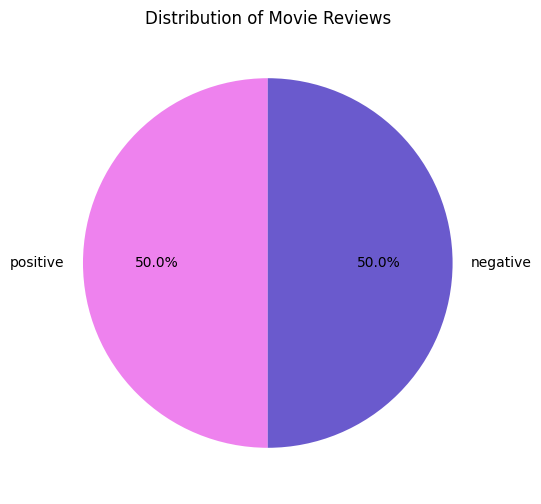

In [6]:
import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df["sentiment"].value_counts(normalize=True) * 100

# Display percentages
print("Percentage of reviews:")
for label, percent in label_counts.items():
    print(f"{label.capitalize()}: {percent:.2f}%")

# Plot percentages
plt.figure(figsize=(6, 6))
colors = ["violet", "slateblue"]
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=label_counts.index)

plt.title("Distribution of Movie Reviews")
plt.ylabel("")
plt.show()


<Axes: >

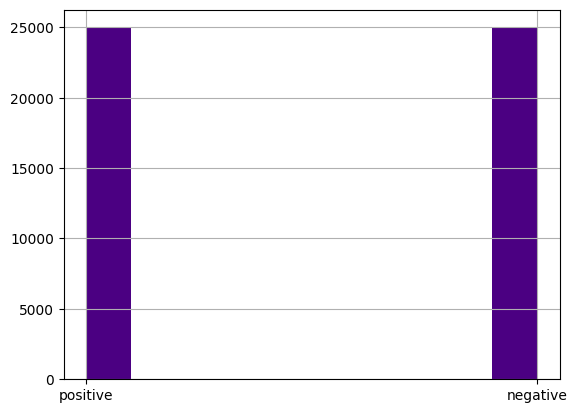

In [7]:
df['sentiment'].hist(color="indigo")

*The distribution is balanced. The dataset contains 50% positive reviews and 50% negative reviews.*

### Data preprocessing:
- all text data was converted to lowercase
- data was cleaned
- stop words were removed
- as the last step, lemmatization was performed

In [8]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<br\s*/?>', ' ', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
df["review"] = df["review"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /home/polina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/polina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/polina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### The sentiment column was converted to binary values for future model training

In [9]:
target_map = {'positive': 1, 'negative': 0}
df['sentiment'] = df['sentiment'].map(target_map)

### Preprocessed data was saved for future use

In [10]:
df.to_csv('cleaned_reviews.csv', index=False)

# Additional data analysis

### The polarity of the reviews was checked and plotted

*The data is normally distributed. However, the variance is not 1, therefore the distribution is different from the standard normal distribution with N (0, 1). Moreover,
it is visible that the majority of the reviews is located in the range of [-0.50, 0.65]*

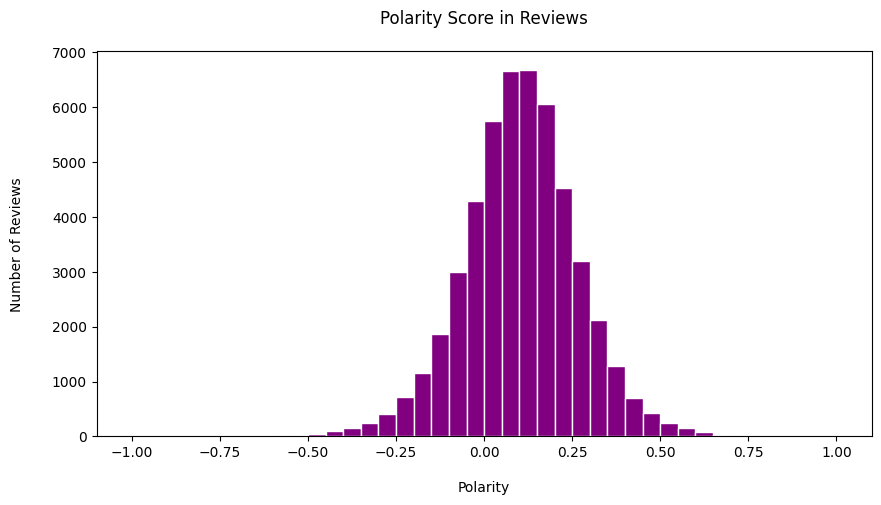

In [9]:
from textblob import TextBlob

df["polarity"] = df["review"].map(lambda Text: TextBlob(Text).sentiment.polarity)
df["polarity"].plot(kind = "hist", bins = 40, edgecolor = "white", linewidth = 1, color = "purple", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "black", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "black")
plt.ylabel("Number of Reviews", labelpad = 20, color = "black")

plt.show()

In [10]:
positive_reviews_count = (df["polarity"] > 0).sum()
negative_reviews_count = (df["polarity"] < 0).sum()

print(f"Number of positive reviews: {positive_reviews_count}")
print(f"Number of negative reviews: {negative_reviews_count}")

Number of positive reviews: 37933
Number of negative reviews: 12036


### The length of the reviews was analysed and plotted

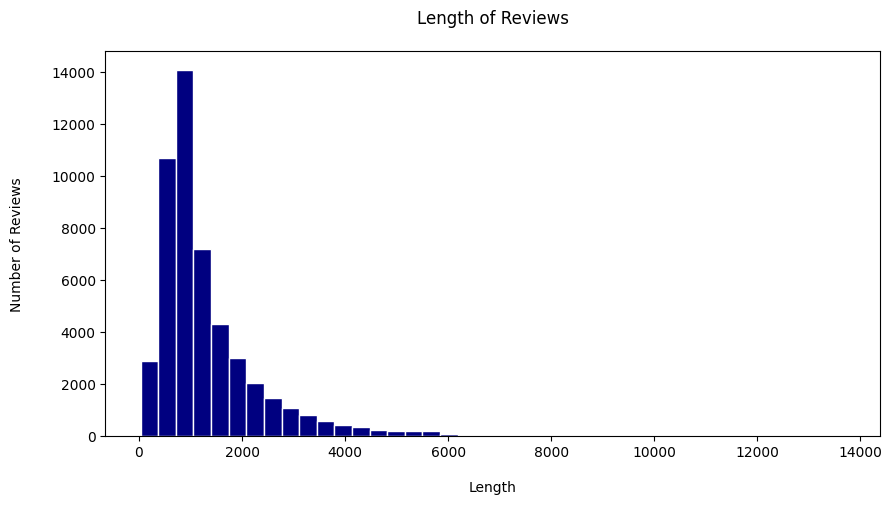

In [11]:
df["length"] = df["review"].astype(str).apply(len)

df["length"].plot(kind = "hist", bins = 40, edgecolor = "white", linewidth = 1, color = "navy", figsize = (10,5))
plt.title("Length of Reviews", color = "black", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "black")
plt.ylabel("Number of Reviews", labelpad = 20, color = "black")

plt.show()

In [ ]:
from transformers import pipeline

# Load the sentiment-analysis pipeline from Hugging Face
sentiment_analyzer = pipeline("sentiment-analysis", device=-1, truncation=True, max_length=512)

# Apply the model to get sentiment labels and scores
df['transformer_polarity'] = df['review'].map(lambda review: sentiment_analyzer(review)[0]['label'])

# Convert sentiment labels ('POSITIVE'/'NEGATIVE') to polarity scores (1/-1)
df['transformer_polarity'] = df['transformer_polarity'].map({'POSITIVE': 1, 'NEGATIVE': -1})

# Count positive and negative reviews
positive_reviews_count_transformer = (df['transformer_polarity'] == 1).sum()
negative_reviews_count_transformer = (df['transformer_polarity'] == -1).sum()

print(f"Number of positive reviews (Transformer): {positive_reviews_count_transformer}")
print(f"Number of negative reviews (Transformer): {negative_reviews_count_transformer}")

# Plot histogram for transformer polarity distribution
df['transformer_polarity'].plot(kind='hist', bins=40, edgecolor='white', linewidth=1, color='purple', figsize=(10, 5))
plt.title("Transformer-Based Polarity Score in Reviews", color="black", pad=20)
plt.xlabel("Polarity", labelpad=15, color="black")
plt.ylabel("Number of Reviews", labelpad=20, color="black")

plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
